In [4]:
print("Author:  Liubov Soldatenko")


Author:  Liubov Soldatenko


In [97]:
%pip install pandas==2.1.0 numpy==1.24.3 scikit-learn==1.3.0 joblib==1.2.0 seaborn==0.13.0 matplotlib==3.7.1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from pandas.plotting import scatter_matrix

import datetime
from datetime import datetime
from datetime import date, timedelta

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pickle
import joblib

from sklearn.metrics import mean_absolute_error, mean_squared_error


# <span style='color:#4682B4'> 1. Get the Data  </span>


In [3]:
data=pd.read_csv('data_train.csv', parse_dates=['date'])
data.head()

,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
0,2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,0,0,0,0,915
1,2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1057
2,2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1482
3,2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1883
4,2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1790


In [4]:
weather=pd.read_csv('weather.csv', parse_dates=['date'])
weather.head()

,date,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,2005-03-20,69.0,8.9,4.4,0.2,0.0,0,11.1,7.6
1,2005-03-21,58.0,13.2,6.2,-0.3,0.0,0,11.3,9.7
2,2005-03-22,52.0,18.0,10.6,3.0,3.3,0,8.6,9.2
3,2005-03-23,79.0,17.6,12.5,7.2,0.0,0,8.4,8.2
4,2005-03-24,71.0,20.1,13.3,6.4,4.3,0,7.9,8.6


In [5]:
data_predict=pd.read_csv('data_test.csv', parse_dates=['date'])
data_predict.head()

,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
0,2010-01-01,3,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN
1,2010-01-02,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN
2,2010-01-03,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN
3,2010-01-04,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN
4,2010-01-05,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN


# <span style='color:#4682B4'> 2. Explore the Data  </span>


## <span style='color:#4682B4'> 2.1. Training Data  </span>


In [6]:
data.shape

(1743, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1743 non-null   datetime64[ns]
 1   bank_holiday    1743 non-null   int64         
 2   feature_0       1743 non-null   int64         
 3   feature_1       1743 non-null   int64         
 4   feature_2       1743 non-null   int64         
 5   feature_3       1743 non-null   float64       
 6   feature_4       1743 non-null   float64       
 7   feature_5       1743 non-null   float64       
 8   feature_6       1743 non-null   float64       
 9   feature_7       1743 non-null   int64         
 10  school_holiday  1743 non-null   int64         
 11  feature_8       1743 non-null   int64         
 12  feature_9       1743 non-null   int64         
 13  feature_10      1743 non-null   int64         
 14  label           1743 non-null   int64         
dtypes: d

<span style='color:#4682B4'> The total number of records in the training dataset is 1743, and there are no NULL values present.</span>

In [8]:
data.isnull().values.any() 

False

In [9]:
len(data.date.unique())

1743

<span style='color:#4682B4'> The data is grouped by date, ensuring there are no duplicates. Let's check if there are any missing days in the training dataset:</span>

In [10]:
my_range = pd.date_range(
  start=data.date.min(), end=data.date.max(), freq='D')
 
print(my_range.difference(data.date))

DatetimeIndex(['2005-12-25', '2006-12-25', '2007-12-25', '2008-12-25',
               '2009-12-25'],
              dtype='datetime64[ns]', freq=None)


<span style='color:#4682B4'> 
    The training dataset lacks data for <b> December 25th </b> across all years. </span>

In [11]:
data.describe()

,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
count,1743,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.0,1743.0,1743.000000,1743.000000
mean,2007-08-10 02:34:29.535283968,0.076879,0.065978,0.052783,0.040734,3.856053,7.076936,2.076936,4.076936,0.043029,0.732071,0.0,0.0,0.058520,1119.440046
min,2005-03-20 00:00:00,0.000000,0.000000,0.000000,0.000000,3.200000,6.700000,1.700000,3.700000,0.000000,0.000000,0.0,0.0,0.000000,142.000000
25%,2006-05-30 12:00:00,0.000000,0.000000,0.000000,0.000000,3.200000,6.700000,1.700000,3.700000,0.000000,0.000000,0.0,0.0,0.000000,623.000000
50%,2007-08-10 00:00:00,0.000000,0.000000,0.000000,0.000000,4.300000,7.300000,2.300000,4.300000,0.000000,0.000000,0.0,0.0,0.000000,930.000000
75%,2008-10-19 12:00:00,0.000000,0.000000,0.000000,0.000000,4.300000,7.300000,2.300000,4.300000,0.000000,1.000000,0.0,0.0,0.000000,1532.000000
max,2009-12-31 00:00:00,3.000000,1.000000,1.000000,1.000000,4.600000,7.600000,2.600000,4.600000,1.000000,3.000000,0.0,0.0,1.000000,3761.000000
std,NaN,0.461925,0.248315,0.223663,0.197731,0.591818,0.349210,0.349210,0.349210,0.202981,1.127334,0.0,0.0,0.234791,616.640338


<span style='color:#4682B4'> As we can see from the table above, <b> feature_8 </b> and <b> feature_9 </b> don't contain any data and can be removed. </span>

## <span style='color:#4682B4'> 2.2. Weather Data  </span>


In [12]:
weather.shape

(2106, 9)

In [13]:
len(weather.date.unique())

2106

In [14]:
print(weather.date.min())
print(weather.date.max())

2005-03-20 00:00:00
2010-12-31 00:00:00


In [15]:
# extract missing dates in weather data
my_range_weather = pd.date_range(
  start=weather.date.min(), end=weather.date.max(), freq='D')
 
print(my_range_weather.difference(weather.date))

DatetimeIndex(['2005-12-25', '2006-12-25', '2007-12-25', '2008-12-25',
               '2009-12-25', '2010-11-28', '2010-12-25'],
              dtype='datetime64[ns]', freq=None)


In [16]:
weather.isna().sum()

date                           0
air_humidity                  38
air_temperature_daily_max     42
air_temperature_daily_mean    33
air_temperature_daily_min     43
precipitation                  0
snow_height                    0
sunshine_hours                41
wind_speed_max                43
dtype: int64

In [17]:
weather.sort_values(by=['date'], inplace=True)

In [18]:
#extracting rows with null values

null_data = weather[weather.isnull().any(axis=1)].reset_index(drop=True)
print("Total # number rows with mssing data:", null_data.shape[0])
print("Distribution of mising values:")
null_data.groupby([null_data['date'].dt.year,null_data['date'].dt.month]).count()


Total # number rows with mssing data: 46
Distribution of mising values:


date  air_humidity  air_temperature_daily_max  \
date date                                                  
2005 4        1             1                          0   
     7        1             1                          0   
     8        7             2                          0   
     9        1             1                          0   
     11       1             1                          1   
     12       1             1                          0   
2006 6        1             1                          0   
2008 7        2             0                          2   
2010 11       1             0                          1   
     12      30             0                          0   

           air_temperature_daily_mean  air_temperature_daily_min  \
date date                                                          
2005 4                              1                          0   
     7                              1                          0   
     8                              6                          0   
     9                              1                          0   
     11                             1                          1   
     12                             1                          0   
2006 6                              1                          0   
2008 7                              0                          1   
2010 11                             1                          1   
     12                             0                          0   

           precipitation  snow_height  sunshine_hours  wind_speed_max  
date date                                                              
2005 4                 1            1               0               0  
     7                 1            1               0               0  
     8                 7            7               1               0  
     9                 1            1               0               0  
     11                1            1               1               0  
     12                1            1               0               0  
2006 6                 1            1               0               0  
2008 7                 2            2               2               2  
2010 11                1            1               1               1  
     12               30           30               0               0

<span style='color:#4682B4'> All weather data (except precipitation and snow height) is empty for the entire <b> December 2010. </b> I will fill the missing values with average values calculated from historical data for 2005-2009.
    <br> For the remaining missing data, I will use the <b> 'ffill' method </b> to fill in NA.</span>

> ### <span style='color:#4682B4'> 2.2.1 Fillna for December 2010 with average by day historical values </span>


In [19]:
null_data_december=null_data[(null_data['date'].dt.year==2010) & (null_data['date'].dt.month==12)].reset_index(drop=True)
null_data_december.head()

,date,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,2010-12-01,NaN,NaN,NaN,NaN,0.5,0,NaN,NaN
1,2010-12-02,NaN,NaN,NaN,NaN,0.4,1,NaN,NaN
2,2010-12-03,NaN,NaN,NaN,NaN,0.0,3,NaN,NaN
3,2010-12-04,NaN,NaN,NaN,NaN,10.1,2,NaN,NaN
4,2010-12-05,NaN,NaN,NaN,NaN,0.0,9,NaN,NaN


In [20]:
weather1=weather.copy()


In [21]:
weather_december=weather1[(weather1.date.dt.year<=2009) & (weather1.date.dt.month==12)]
weather_december_average = weather_december.groupby(weather_december.date.dt.day).mean()
weather_december_average['date2'] = pd.to_datetime(date(year=2010, month=12, day=1))+ pd.to_timedelta(weather_december_average.date.dt.day, unit='days') - pd.to_timedelta(1, unit='days')
weather_december_average.drop(columns='date', inplace=True)

weather_december_average.insert(0, 'date', weather_december_average.pop('date2'))
weather_december_average.reset_index(drop=True, inplace=True)

weather_december_average.head()

,date,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,2010-12-01,84.2,6.96,4.48,1.36,0.52,1.2,4.62,9.38
1,2010-12-02,81.6,7.70,5.02,2.36,7.04,1.2,1.30,12.26
2,2010-12-03,84.0,8.24,6.04,4.12,1.02,0.0,1.86,13.78
3,2010-12-04,87.8,7.82,5.74,4.36,2.32,0.0,0.62,11.48
4,2010-12-05,88.0,9.72,7.96,6.04,4.74,0.0,0.12,12.94


In [22]:
# fill null December data with average data agreagated for the last 5 years
weather_december_filled=null_data_december.combine_first(weather_december_average) 
weather_december_filled.head()

,date,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,2010-12-01,84.2,6.96,4.48,1.36,0.5,0.0,4.62,9.38
1,2010-12-02,81.6,7.70,5.02,2.36,0.4,1.0,1.30,12.26
2,2010-12-03,84.0,8.24,6.04,4.12,0.0,3.0,1.86,13.78
3,2010-12-04,87.8,7.82,5.74,4.36,10.1,2.0,0.62,11.48
4,2010-12-05,88.0,9.72,7.96,6.04,0.0,9.0,0.12,12.94


> ### <span style='color:#4682B4'> 2.2.2 Fillna for other dates with ffill</span>


In [23]:
# drop december 2010 data
weather_other_dates=weather[weather.date<null_data_december.loc[0,'date']].copy()
weather_other_dates.isnull().sum()

date                           0
air_humidity                   8
air_temperature_daily_max     12
air_temperature_daily_mean     3
air_temperature_daily_min     13
precipitation                  0
snow_height                    0
sunshine_hours                11
wind_speed_max                13
dtype: int64

In [24]:
 weather_other_dates.shape[0]+weather_december_filled.shape[0]==weather.shape[0]

True

In [25]:
weather_fillna=weather_other_dates.ffill()

In [26]:
weather_fillna.isnull().sum()

date                          0
air_humidity                  0
air_temperature_daily_max     0
air_temperature_daily_mean    0
air_temperature_daily_min     0
precipitation                 0
snow_height                   0
sunshine_hours                0
wind_speed_max                0
dtype: int64

In [27]:
# concat with December filled data
weather_final=pd.concat([weather_fillna, weather_december_average]).reset_index(drop=True)
weather_final.shape[0]==weather.shape[0]

True

In [28]:
weather_final

,date,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,2005-03-20,69.0,8.90,4.40,0.20,0.00,0.0,11.10,7.60
1,2005-03-21,58.0,13.20,6.20,-0.30,0.00,0.0,11.30,9.70
2,2005-03-22,52.0,18.00,10.60,3.00,3.30,0.0,8.60,9.20
3,2005-03-23,79.0,17.60,12.50,7.20,0.00,0.0,8.40,8.20
4,2005-03-24,71.0,20.10,13.30,6.40,4.30,0.0,7.90,8.60
...,...,...,...,...,...,...,...,...,...
2101,2010-12-27,86.2,2.18,0.66,-0.66,1.02,0.6,1.06,11.52
2102,2010-12-28,88.2,3.42,1.12,-1.66,0.58,0.2,2.48,11.78
2103,2010-12-29,89.4,2.48,0.44,-1.34,1.14,0.6,2.06,11.20
2104,2010-12-30,87.0,3.00,1.02,-1.10,5.62,1.0,2.04,12.38


## <span style='color:#4682B4'> 2.2. Test Data (data for prediction) </span>


In [29]:
data_predict.shape

(363, 15)

In [30]:
data_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            363 non-null    datetime64[ns]
 1   bank_holiday    363 non-null    int64         
 2   feature_0       363 non-null    int64         
 3   feature_1       363 non-null    int64         
 4   feature_2       363 non-null    int64         
 5   feature_3       363 non-null    float64       
 6   feature_4       363 non-null    float64       
 7   feature_5       363 non-null    float64       
 8   feature_6       363 non-null    float64       
 9   feature_7       363 non-null    int64         
 10  school_holiday  363 non-null    int64         
 11  feature_8       363 non-null    int64         
 12  feature_9       363 non-null    int64         
 13  feature_10      363 non-null    int64         
 14  label           0 non-null      float64       
dtypes: dat

In [31]:
data_predict.isnull().any()

date              False
bank_holiday      False
feature_0         False
feature_1         False
feature_2         False
feature_3         False
feature_4         False
feature_5         False
feature_6         False
feature_7         False
school_holiday    False
feature_8         False
feature_9         False
feature_10        False
label              True
dtype: bool

In [32]:
print(data_predict.date.min())
print(data_predict.date.max())

2010-01-01 00:00:00
2010-12-31 00:00:00


In [33]:
my_range_predict = pd.date_range(
  start=data_predict.date.min(), end=data_predict.date.max(), freq='D')
 
print(my_range_predict.difference(data_predict.date))

DatetimeIndex(['2010-11-28', '2010-12-25'], dtype='datetime64[ns]', freq=None)


<span style='color:#4682B4'> <b> The task </b> is to predict the entire 2010 visitors data, excluding ['2010-11-28', '2010-12-25'] </span>

# <span style='color:#4682B4'> 3. Exploratory Data Analysis  </span>


## <span style='color:#4682B4'> 3.1  Join with weather data</span>

In [34]:
# copy training data and merge it with weather
data_eda=data.merge(weather_final, how='inner', left_on='date', right_on='date')
data_eda.head()

,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_10,label,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,915,69.0,8.9,4.4,0.2,0.0,0.0,11.1,7.6
1,2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,1057,58.0,13.2,6.2,-0.3,0.0,0.0,11.3,9.7
2,2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,1482,52.0,18.0,10.6,3.0,3.3,0.0,8.6,9.2
3,2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,1883,79.0,17.6,12.5,7.2,0.0,0.0,8.4,8.2
4,2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,1790,71.0,20.1,13.3,6.4,4.3,0.0,7.9,8.6


In [35]:
# function to extract data info from date
def extract_date_info(df):
    """
    function to extract date info (day, year, month and etc) 
    """
    df['date2'] = pd.to_datetime(df['date'])
    df['Day'] = df['date2'].dt.day.astype('int')
    df['Month'] = df['date2'].dt.month.astype('int')
    df['Year'] = df['date2'].dt.year.astype('int')
    df['DayOfWeek'] = df['date2'].dt.weekday
    df['WeekOfYear'] = df['date2'].dt.isocalendar().week.astype('int')
    df = df.drop(columns = ['date2'], inplace=True)

    return df

In [36]:
extract_date_info(data_eda)

In [37]:
data_eda.columns.sort_values()

Index(['Day', 'DayOfWeek', 'Month', 'WeekOfYear', 'Year', 'air_humidity',
       'air_temperature_daily_max', 'air_temperature_daily_mean',
       'air_temperature_daily_min', 'bank_holiday', 'date', 'feature_0',
       'feature_1', 'feature_10', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'label', 'precipitation', 'school_holiday', 'snow_height',
       'sunshine_hours', 'wind_speed_max'],
      dtype='object')

In [38]:
cols=['Day', 'DayOfWeek', 'Month', 'WeekOfYear','Year','bank_holiday','school_holiday',
      'feature_0', 'feature_1','feature_2', 'feature_3', 'feature_4', 'feature_5',
      'feature_6', 'feature_7', 'feature_8', 'feature_9','feature_10', 
      'air_temperature_daily_max', 'air_temperature_daily_mean','air_temperature_daily_min',
      'air_humidity','snow_height', 'sunshine_hours','wind_speed_max','precipitation', 'label'] 

    

In [39]:
# sort columns in specific order
data_eda = data_eda[cols]

## <span style='color:#4682B4'> 3.2  Heatmap of correlation matrix  </span>

<Axes: >

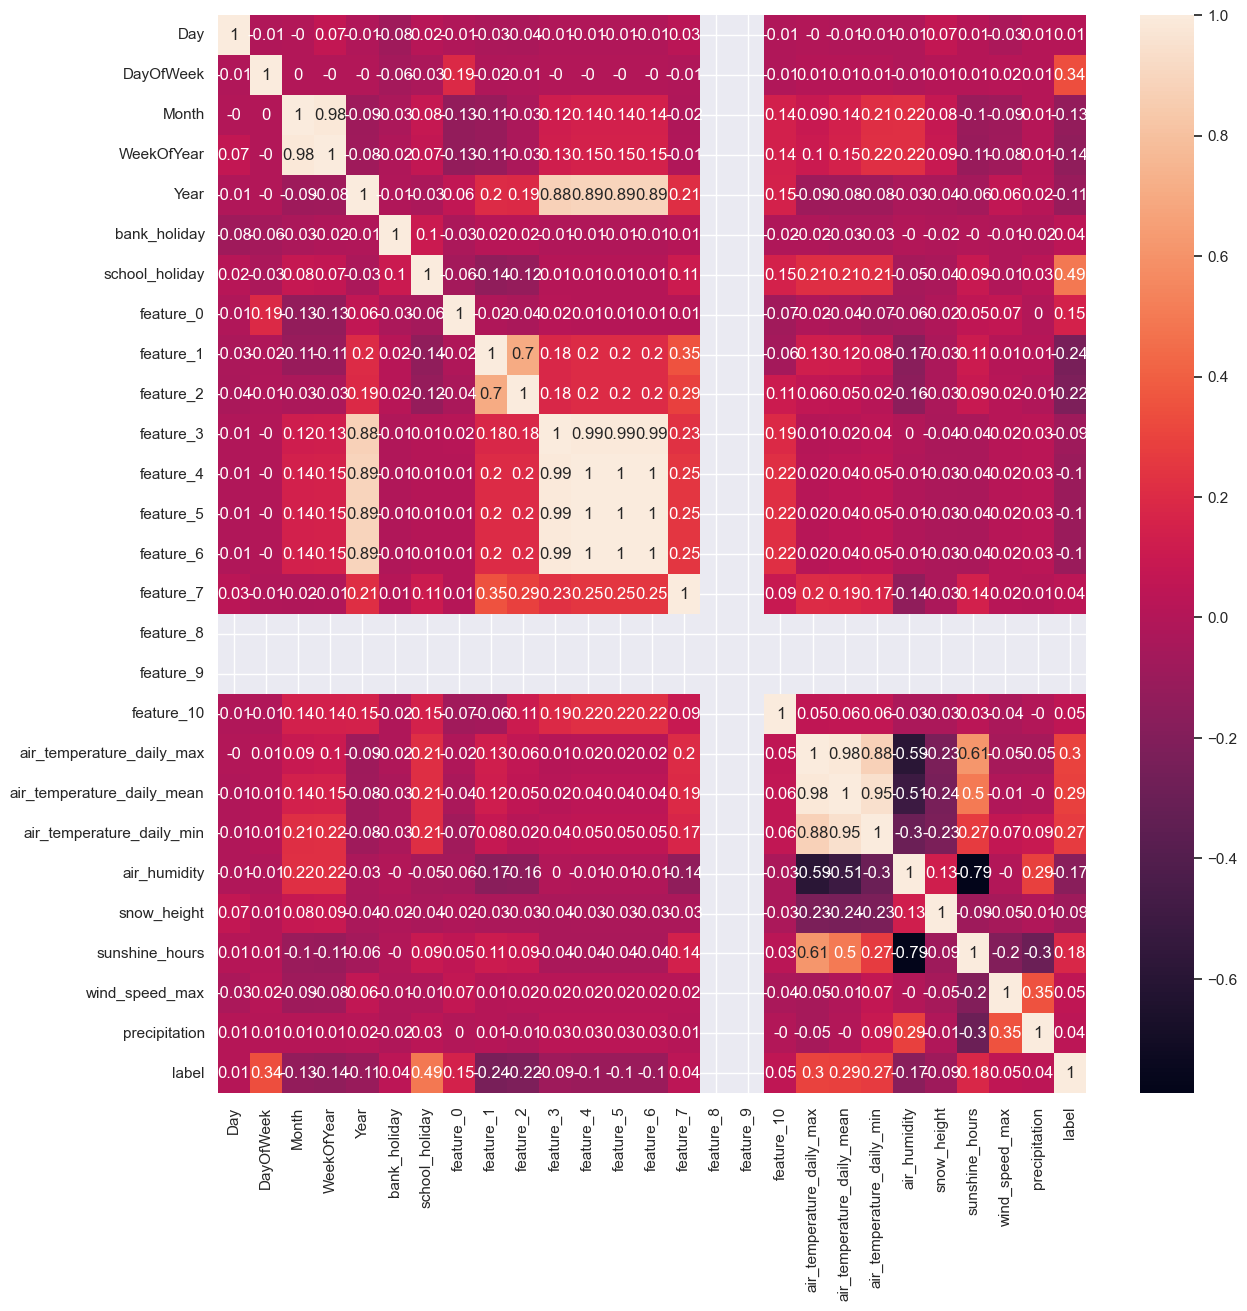

In [40]:
sns.set (rc = {'figure.figsize':(14, 14)})
sns.heatmap(data_eda.corr().round(decimals=2), annot = True)

<span style='color:#4682B4'> 1.<b> feature_3 </b>, <b> feature_4 </b>, <b> feature_5 </b>, <b> feature_6 </b> are strongly correlated to each other <b> (corr close to 1)</b> and bring no new information to a dataset but do add to the complexity. So we have to drop three of them (feature_3, feature_5 and feature_6) 
<br> 2. <b> feature_8 </b>, <b> feature_9 </b> have no data (see 2.1) and shoud be removed also
<br>  3. <b> air_temperature_daily_max, air_temperature_daily_mean,air_temperature_daily_min </b> also may cause redundancy of data and it makes sense to live only of them - <b> air_temperature_daily_mean </b> 
 
</span> 


In [41]:
columns_to_drop=['feature_8','feature_9','feature_3','feature_5','feature_6', 'air_temperature_daily_min', 'air_temperature_daily_max']

<Axes: >

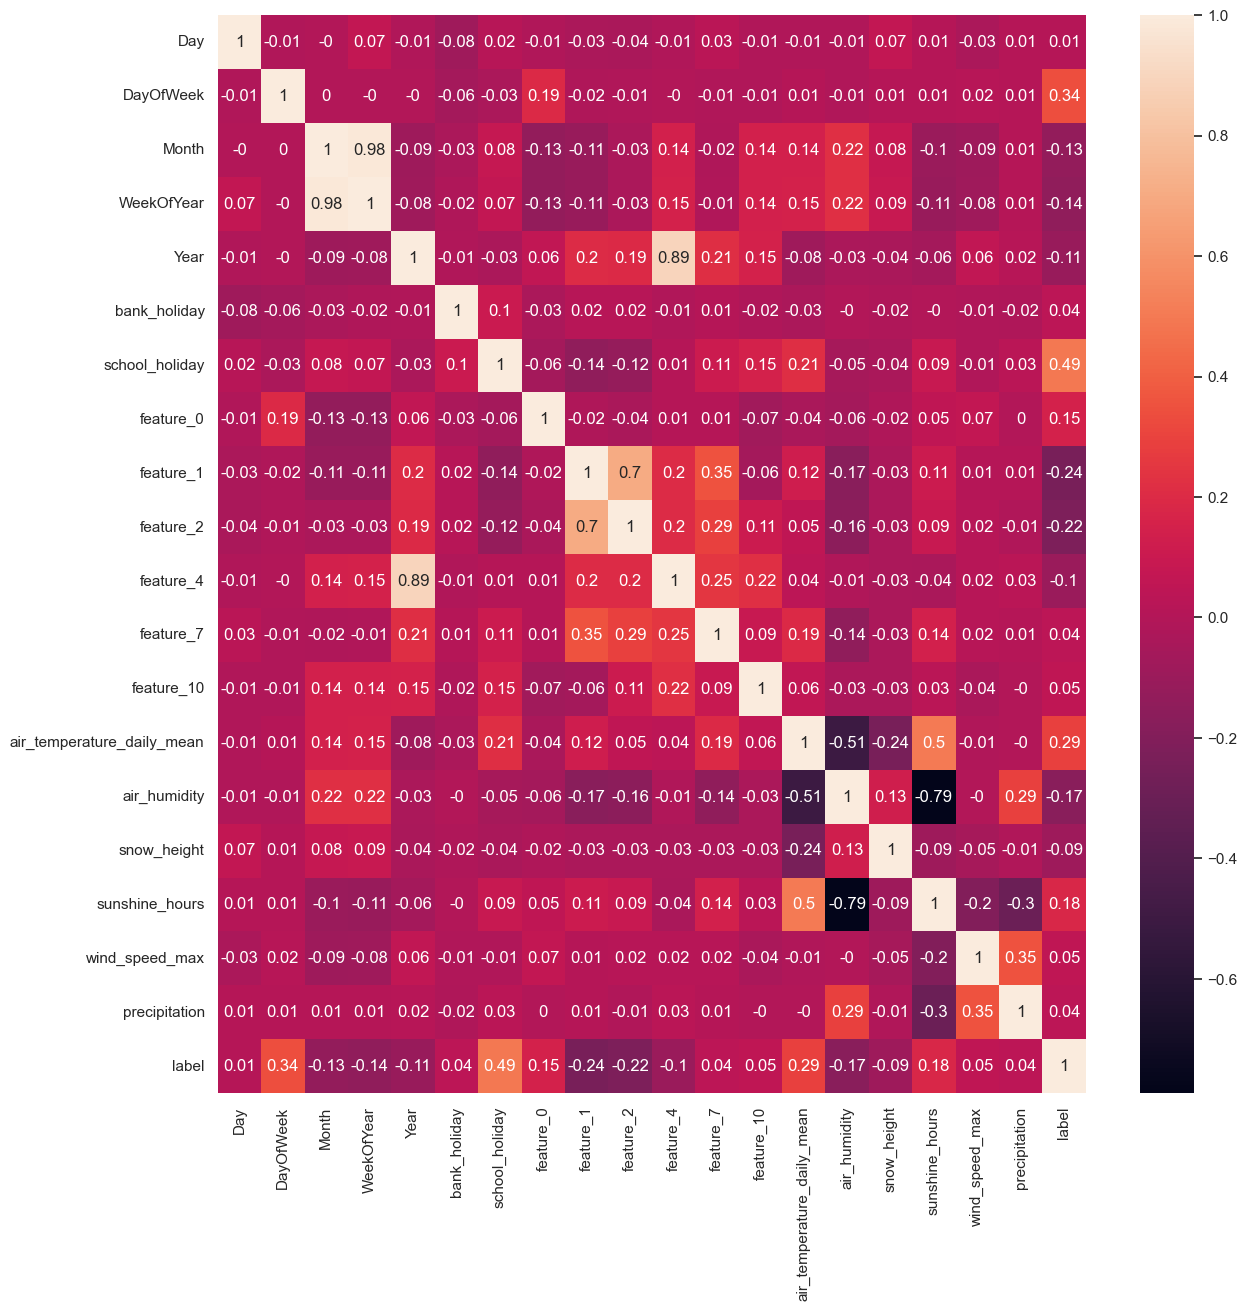

In [42]:
sns.heatmap(data_eda.drop(columns=columns_to_drop).corr().round(decimals=2), annot = True)

## <span style='color:#4682B4'> 3.3  "Unlabeled features"  </span>

In [43]:
unlabeled_features=['feature_0', 'feature_1', 'feature_2', 'feature_4',
       'feature_7', 'feature_10']

In [44]:
# data_eda[unlabeled_features].groupby(['Year','Month']).sum()
for i in unlabeled_features:
    print(i+':', data_eda[i].unique())

feature_0: [0 1]
feature_1: [0 1]
feature_2: [0 1]
feature_4: [6.7 7.3 7.6]
feature_7: [0 1]
feature_10: [0 1]


In [45]:
data_eda[unlabeled_features].agg(['count', 'sum'])


,feature_0,feature_1,feature_2,feature_4,feature_7,feature_10
count,1743,1743,1743,1743.0,1743,1743
sum,115,92,71,12335.1,75,102


In [46]:
data_predict[unlabeled_features].agg(['count', 'sum'])

,feature_0,feature_1,feature_2,feature_4,feature_7,feature_10
count,363,363,363,363.0,363,363
sum,16,13,0,2758.8,21,52


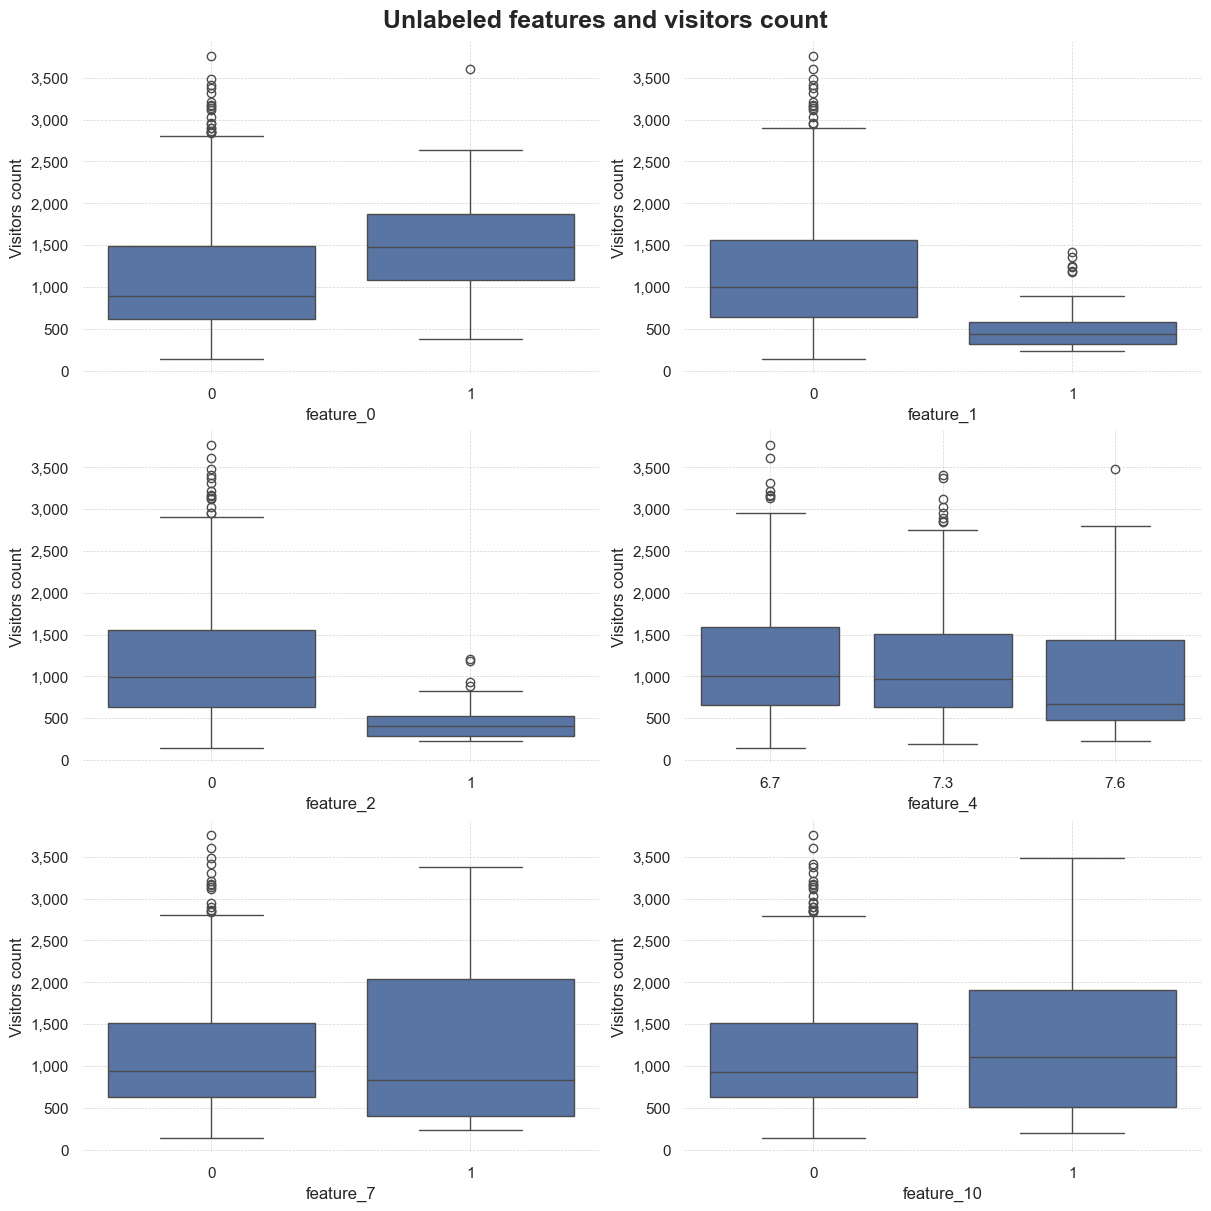

In [47]:
fig, axs= plt.subplots(3, 2, figsize=(12,12),constrained_layout=True)
fig.suptitle("Unlabeled features and visitors count", fontsize=18, fontweight='bold')
 
for i, ax in zip(unlabeled_features, axs.flatten()):
    sns.boxplot(data=data_eda, x=i, y='label', ax=ax)
#     ax.title.set_text(i)
    
    ax.xaxis.set_major_locator(MultipleLocator(1))
    fmt = '{x:,.0f}'
    ytick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(ytick)
    
    ax.set_facecolor("white")
    ax.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)
    ax.grid(axis = 'x',color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set(ylabel='Visitors count')
    




## <span style='color:#4682B4'> 3.4 Seosonality by month/week of year</span>

In [48]:
df_grouped_by_month=data_eda.groupby(['Year','Month'])['label'].sum().reset_index()
df_grouped_by_month.sort_index(inplace=True)
df_grouped_by_month.head()

,Year,Month,label
0,2005,3,22656
1,2005,4,32319
2,2005,5,34641
3,2005,6,34630
4,2005,7,49099


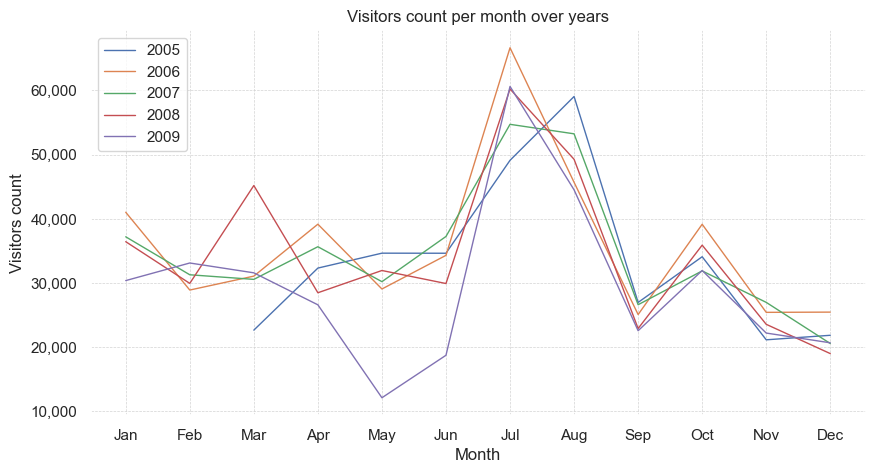

In [49]:
plt.figure(figsize=(10, 5))
years=list(df_grouped_by_month['Year'].unique())

for i in years:
    plt.plot(df_grouped_by_month['Month'][df_grouped_by_month['Year']==i], 
         df_grouped_by_month['label'][df_grouped_by_month['Year']==i], label=i, linewidth=1)
    

fmt = '{x:,.0f}'
ytick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(ytick)
plt.xticks(range(1,13,1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(ncol=1, loc='upper left',facecolor='white')
plt.gca().set_facecolor("white")
plt.title("Visitors count per month over years")
plt.xlabel("Month")
plt.ylabel("Visitors count")

plt.grid(axis = 'x',color='lightgrey', linestyle='--', linewidth=0.5)
plt.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)

<span style='color:#4682B4'> The <b> largest </b> number of visitors occurs during the summer months.
<br> We can also observe that # visitors is unusually low in May and June of 2009. </span>

In [50]:
df_grouped_by_week_of_year=data_eda.groupby(['Year','WeekOfYear'])['label'].sum().reset_index()
df_grouped_by_week_of_year.sort_index(inplace=True)
df_grouped_by_week_of_year.head()

,Year,WeekOfYear,label
0,2005,11,915
1,2005,12,10751
2,2005,13,16272
3,2005,14,8519
4,2005,15,7585


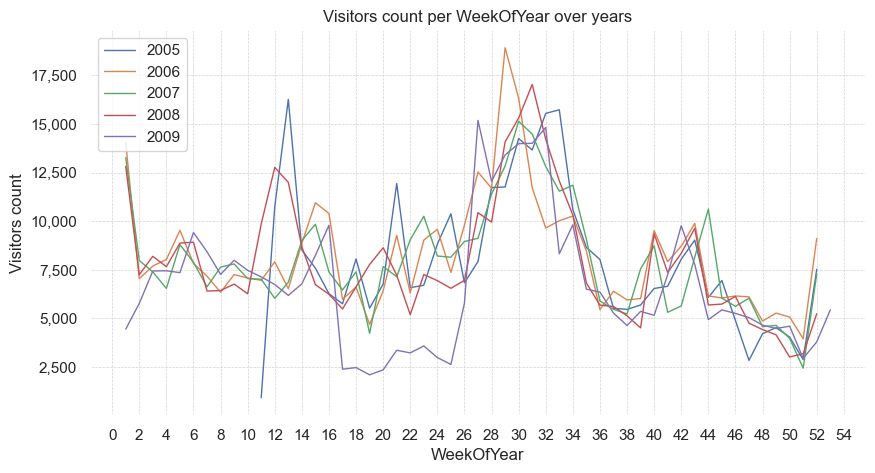

In [51]:
plt.figure(figsize=(10, 5))
years=list(df_grouped_by_week_of_year['Year'].unique())

for i in years:
    plt.plot(df_grouped_by_week_of_year['WeekOfYear'][df_grouped_by_week_of_year['Year']==i], 
         df_grouped_by_week_of_year['label'][df_grouped_by_week_of_year['Year']==i], label=i,linewidth=1)
    

fmt = '{x:,.0f}'
ytick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(ytick)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.legend(ncol=1, loc='upper left',facecolor='white')
plt.gca().set_facecolor("white")
plt.title("Visitors count per WeekOfYear over years")
plt.xlabel("WeekOfYear")
plt.ylabel("Visitors count")

plt.grid(axis = 'x',color='lightgrey', linestyle='--', linewidth=0.5)
plt.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)

 <span style='color:#4682B4'> We need to investigate the possible reasons for a <b> significantly lower visitor count during weeks 17-27 in 2009 </b> compared to other years. Are there mistakes in the data, or can the decrease in the number of visitors be explained by extremely bad weather conditions?</span>

## <span style='color:#4682B4'> 3.4 Explore visitors decline reasons during 17-27 weeks in 2009 </span>

In [52]:
data_17_27_weeks=data_eda[(data_eda['WeekOfYear']>=17)&(data_eda['WeekOfYear']<=27)]

In [53]:
def get_year_group(year):
    if year < 2009:
        return '2005-2008'
    else:
        return '2009'

In [54]:
# Apply the get_age_group function to the age column
data_17_27_weeks.loc[:,'YearGroup'] = data_17_27_weeks['Year'].apply(get_year_group)

/var/folders/sp/f7xkr76d0dqgwhvyyq7wyzm00000gn/T/ipykernel_55255/1117398017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_17_27_weeks.loc[:,'YearGroup'] = data_17_27_weeks['Year'].apply(get_year_group)


In [55]:
weather_feautures=list(weather.columns)
weather_feautures.remove('date')
weather_feautures.remove('air_temperature_daily_max')
weather_feautures.remove('air_temperature_daily_min')
print(len(weather_feautures))
print(weather_feautures)

6
['air_humidity', 'air_temperature_daily_mean', 'precipitation', 'snow_height', 'sunshine_hours', 'wind_speed_max']


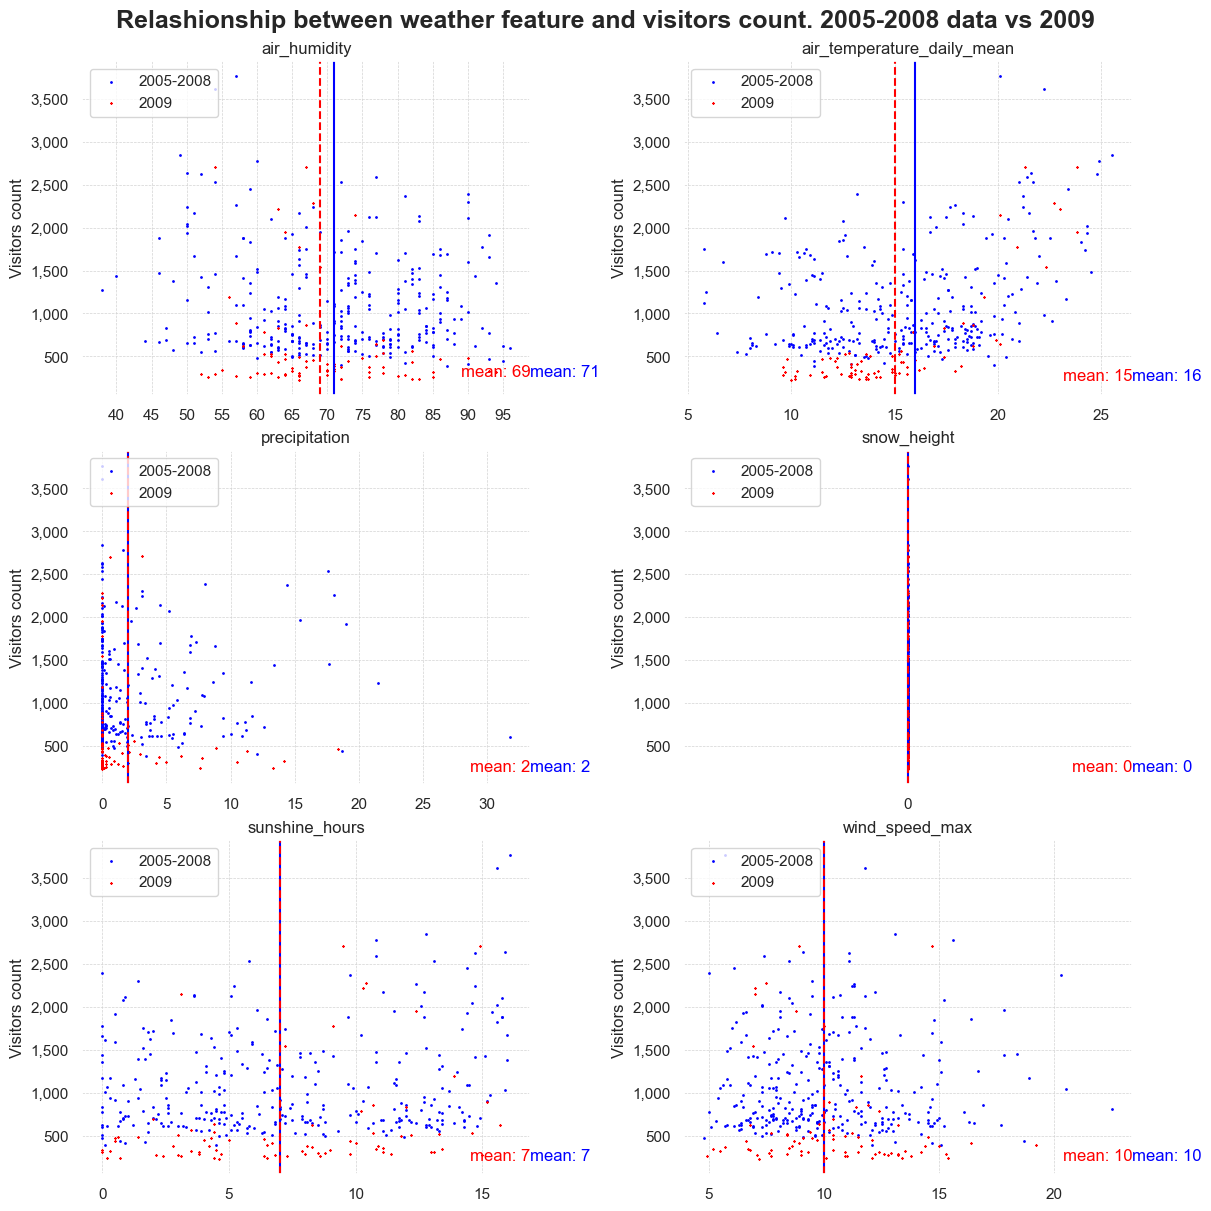

In [56]:
fig, axs= plt.subplots(3, 2, figsize=(12,12),constrained_layout=True)
fig.suptitle("Relashionship between weather feature and visitors count. 2005-2008 data vs 2009", fontsize=18, fontweight='bold')
 
for i, ax in zip(weather_feautures, axs.ravel()):
    
    ax.scatter(x=data_17_27_weeks[i][data_17_27_weeks.Year!=2009], y=data_17_27_weeks['label'][data_17_27_weeks.Year!=2009],s=1, label='2005-2008', color='blue')
    ax.scatter(x=data_17_27_weeks[i][data_17_27_weeks.Year==2009], y=data_17_27_weeks['label'][data_17_27_weeks.Year==2009],s=1,marker='x', label='2009', color='red')
    
    mean_2005_2008=np.round(data_17_27_weeks[i][data_17_27_weeks.Year!=2009].mean())
    ax.axvline(mean_2005_2008, color='blue', ls='-')
    ax.text(1, mean_2005_2008, f'mean: {mean_2005_2008:,.0f}\n',
        ha='left', va='baseline', color='blue', transform=ax.get_yaxis_transform())

    mean_2009=np.round(data_17_27_weeks[i][data_17_27_weeks.Year==2009].mean())
    ax.axvline(mean_2009, color='red', ls='--')
    ax.text(1, mean_2009, f'mean: {mean_2009:,.0f}\n',
        ha='right', va='baseline', color='red', transform=ax.get_yaxis_transform())

    
    ax.legend(ncol=1, loc='upper left',facecolor='white')
    ax.title.set_text(i)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    fmt = '{x:,.0f}'
    ytick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(ytick)
    
    ax.set_facecolor("white")
    ax.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)
    ax.grid(axis = 'x',color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set(ylabel='Visitors count')

 <span style='color:#4682B4'> As we can see from the graphs above, there is no significant difference in weather conditions during weeks 17-27 in 2009 compared to the previous years from 2005 to 2008. Let's explore other unlabeled features: <b> feature_0, feature_1, feature_2, feature_4, feature_7, and feature_10 </b> to understand whether they have an impact on the number of visitors in 2009 or not.</span>

In [57]:
unlabeled_features=[
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_4',
 'feature_7',
 'feature_10',
]

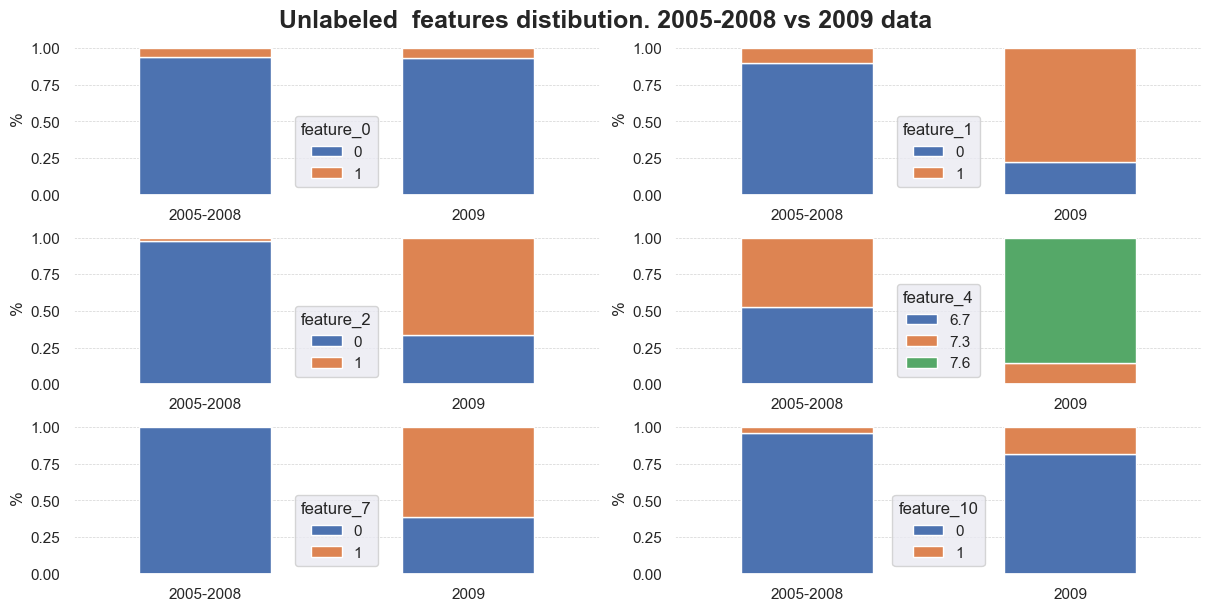

In [58]:
n_col=2
n_row=3
fig, axs= plt.subplots(n_row, n_col, figsize=(12,6),constrained_layout=True)
fig.suptitle("Unlabeled  features distibution. 2005-2008 vs 2009 data", fontsize=18, fontweight='bold')


for i,ax in zip(unlabeled_features, axs.ravel()):
    df= pd.crosstab(data_17_27_weeks['YearGroup'], data_17_27_weeks[i], normalize='index')
    df.plot(kind='bar', stacked=True,ax=ax)
    ax.set_facecolor("white")
#             ax.legend(ncol=1, loc='best',facecolor='white')
    ax.set_xticklabels(labels=['2005-2008','2009'],fontdict=None, minor=False, rotation=0)
    ax.set(ylabel='%', xlabel='')
    ax.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)
    


 <span style='color:#4682B4'> Unusual decrease of visitors count during 17-27 weeks in 2009 can be explained by data, stored in <b> feature_1, feature_2, feature_4, feature_7 </b>.  </span>

##  <span style='color:#4682B4'> 3.5 Seosonality by DayOfWeek </span>

In [59]:
df_grouped_by_weekday=data_eda.groupby(['Year','Month','DayOfWeek'])['label'].mean().reset_index()
df_grouped_by_weekday.sort_index(inplace=True)
df_grouped_by_weekday.head()

,Year,Month,DayOfWeek,label
0,2005,3,0,1499.5
1,2005,3,1,2117.5
2,2005,3,2,2521.5
3,2005,3,3,2462.5
4,2005,3,4,2193.0


/var/folders/sp/f7xkr76d0dqgwhvyyq7wyzm00000gn/T/ipykernel_55255/1085670578.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)


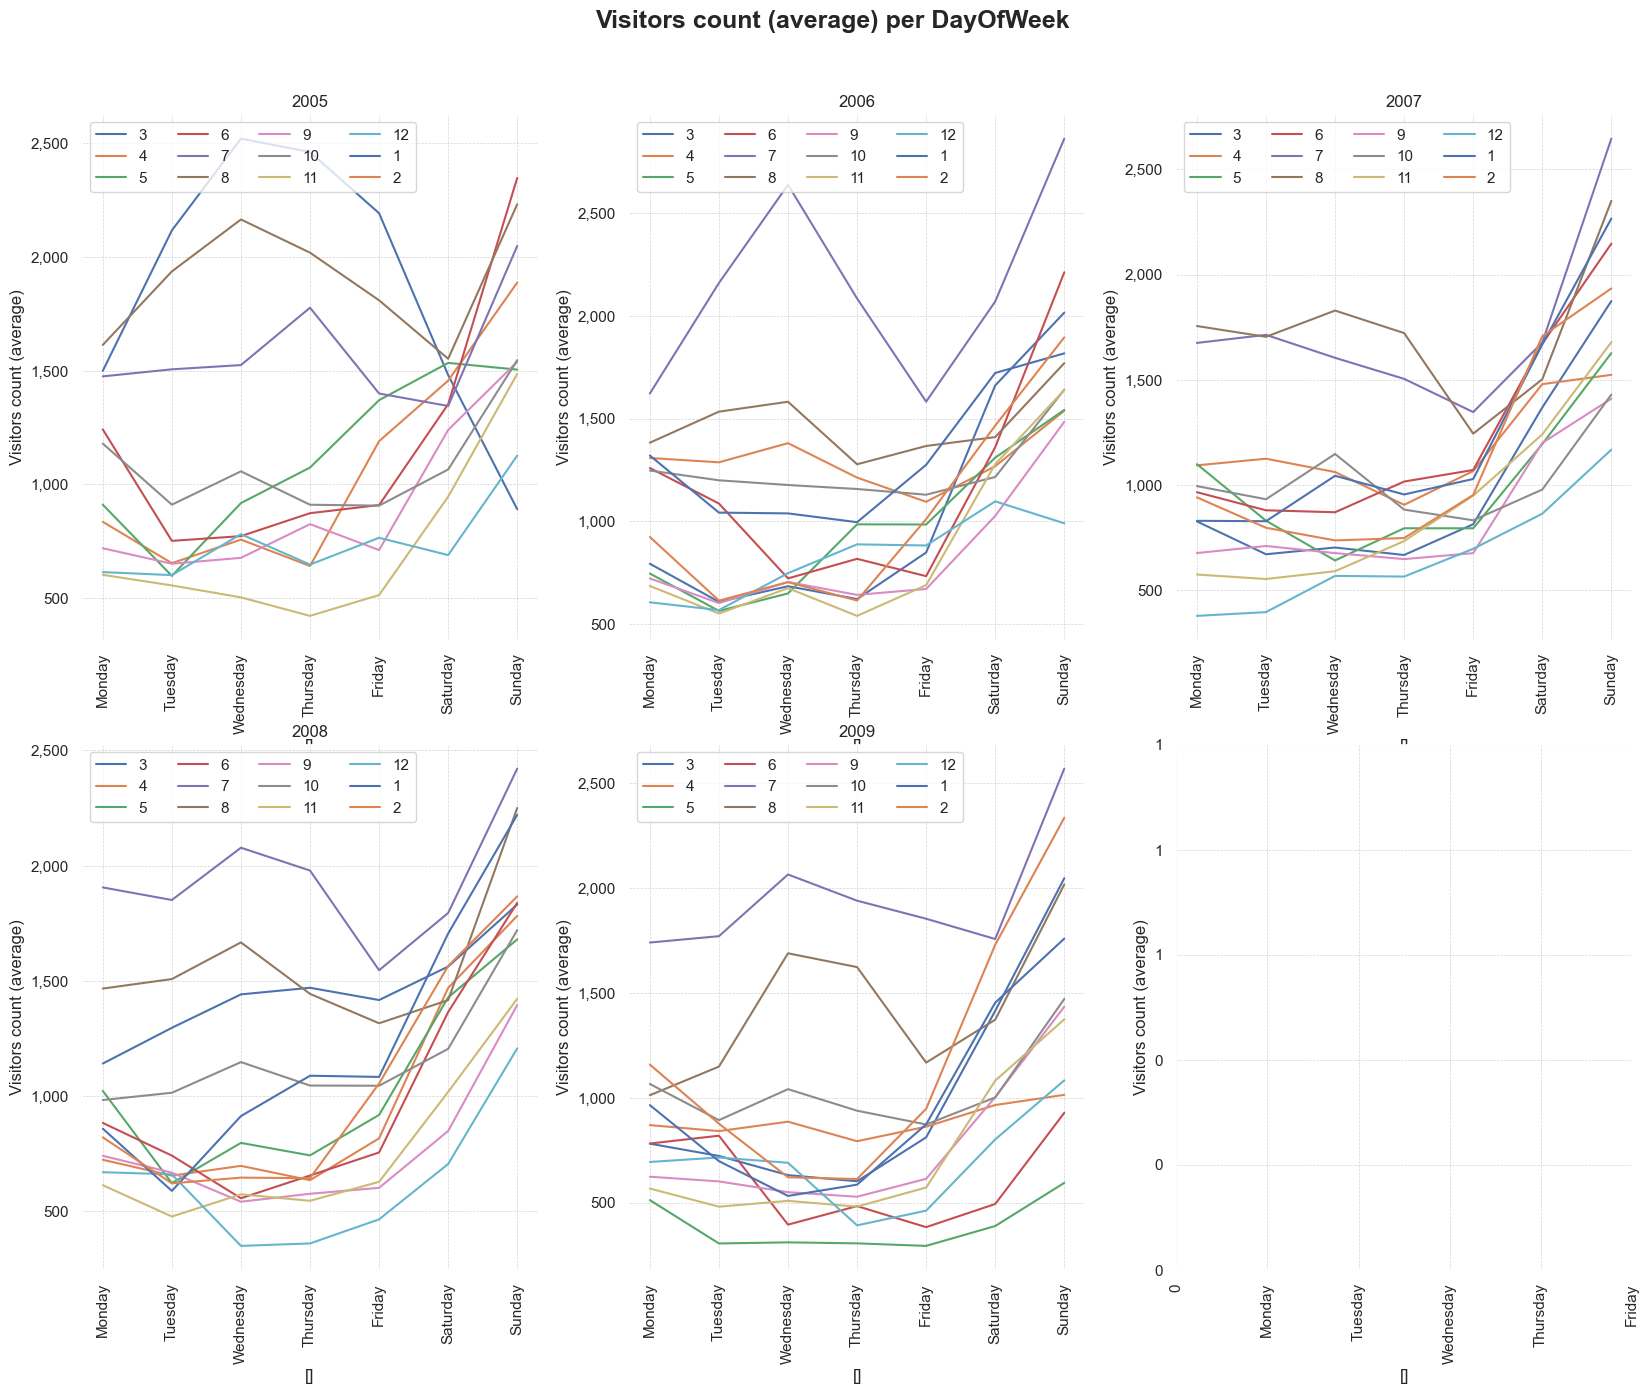

In [60]:
fig, axs = plt.subplots(2, 3, figsize=(20,15))
fig.suptitle("Visitors count (average) per DayOfWeek", fontsize=18, fontweight='bold', y=0.95)

years=list(df_grouped_by_weekday['Year'].unique())
months=list(df_grouped_by_weekday['Month'].unique())
weekdays=list(df_grouped_by_weekday['DayOfWeek'].unique())

for year, ax in zip(years, axs.ravel()):
    df_year=df_grouped_by_weekday[df_grouped_by_weekday['Year'] == year]
    for i in months:
        ax.plot(df_year['DayOfWeek'][df_year['Month']==i], df_year['label'][df_year['Month']==i], label=i)
   # ax.plot(df_year['Month'],df_year['Sales'])
    ax.legend(ncol=4, loc='upper left',facecolor='white')
    ax.title.set_text(year)

fmt = '{x:,.0f}'
ytick = mtick.StrMethodFormatter(fmt)

for ax in axs.flat:
    ax.set(xlabel=[], ylabel='Visitors count (average)')
    ax.yaxis.set_major_formatter(ytick)
    ax.set_xticklabels(['0','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
    ax.set_facecolor("white")
    ax.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5) 
    ax.grid(axis = 'x',color='lightgrey', linestyle='--', linewidth=0.5)


plt.show()

<span style='color:#4682B4'> The <b> largest </b> number of visitors is during weekends.</span>

##  <span style='color:#4682B4'> 3.6 Daily visitors distribution during School Holidays </span>

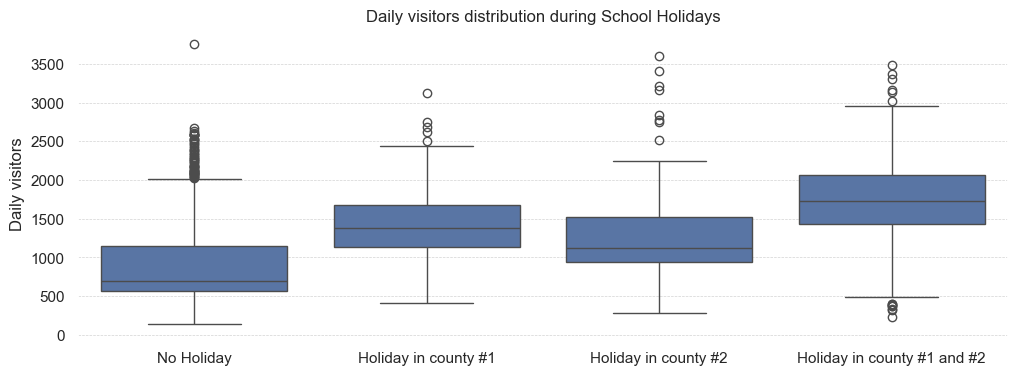

In [61]:
plt.figure(figsize=(12, 4))
ax=sns.boxplot(data=data_eda, x='school_holiday', y='label')
#plt.xlabel('School Holidays')
ax.set(xlabel=None)
plt.ylabel('Daily visitors')
plt.title('Daily visitors distribution during School Holidays')
fmt = '{x:,.0f}'
ytick = mtick.StrMethodFormatter(fmt)
plt.xticks([0, 1, 2, 3], ['No Holiday', 'Holiday in county #1', 'Holiday in county #2', 'Holiday in county #1 and #2'])
plt.gca().set_facecolor("white")
plt.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)


<span style='color:#4682B4'> The number of visitors is higher on school holidays and <b> the highest </b> during holidays observed in both counties. </span>

##  <span style='color:#4682B4'> 3.7 Daily visitors distribution during Bank Holidays </span>

In [62]:
data_eda.bank_holiday.unique()

array([0, 3, 2])

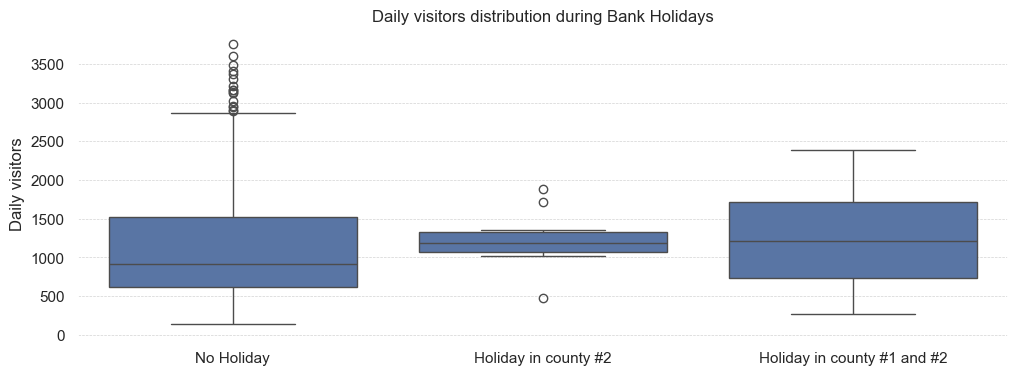

In [63]:
plt.figure(figsize=(12, 4))
ax=sns.boxplot(data=data_eda, x='bank_holiday', y='label')
#plt.xlabel('School Holidays')
ax.set(xlabel=None)
plt.ylabel('Daily visitors')
plt.title('Daily visitors distribution during Bank Holidays')
plt.xticks([0, 1, 2], ['No Holiday', 'Holiday in county #2', 'Holiday in county #1 and #2'])
plt.gca().set_facecolor("white")
plt.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)

<span style='color:#4682B4'> On average, the number of visitors is slightly higher during bank holidays. </span>

##  <span style='color:#4682B4'> 3.8 Daily visitors & weather conditions </span>

In [64]:
weather_feautures=list(weather.columns)
weather_feautures.remove('date')
weather_feautures.remove('air_temperature_daily_max')
weather_feautures.remove('air_temperature_daily_min')
# print(len(weather_feautures))
print(weather_feautures)

['air_humidity', 'air_temperature_daily_mean', 'precipitation', 'snow_height', 'sunshine_hours', 'wind_speed_max']


In [65]:
#scatter_matrix(data_eda[weather_feautures], alpha=0.5, figsize=(12, 12), diagonal='kde')

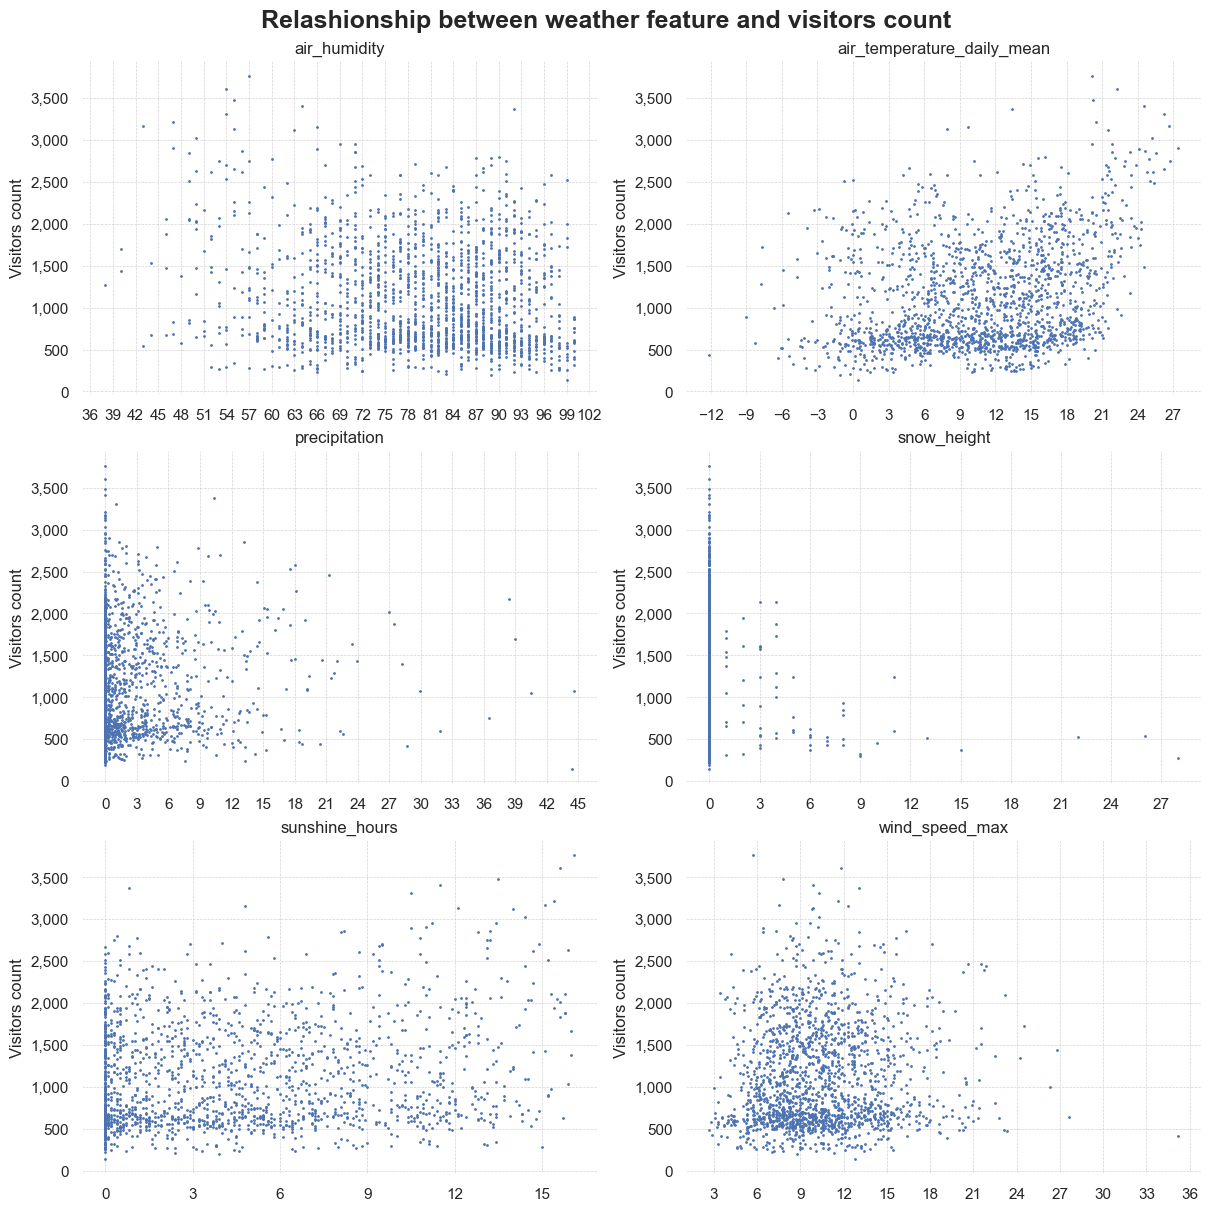

In [66]:
fig, axs= plt.subplots(3, 2, figsize=(12,12),constrained_layout=True)
fig.suptitle("Relashionship between weather feature and visitors count", fontsize=18, fontweight='bold')
 
for i, ax in zip(weather_feautures, axs.ravel()):
    ax.scatter(x=data_eda[i], y=data_eda['label'],s=1)
    ax.title.set_text(i)
    
    ax.xaxis.set_major_locator(MultipleLocator(3))
    fmt = '{x:,.0f}'
    ytick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(ytick)
    
    ax.set_facecolor("white")
    ax.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)
    ax.grid(axis = 'x',color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set(ylabel='Visitors count')
    




<span style='color:#4682B4'> The number of visitors reaches its highest values when the mean daily temperature is 20 and higher. </span>

<span style='color:#4682B4'> The number of daily visitors decreases on windy days. </span>

# <span style='color:#4682B4'> 4. Prepare data for training </span>


In [67]:
# copy training data and merge it with weather
data_merged=data.merge(weather_final, how='inner', left_on='date', right_on='date')
data_merged.head()


,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_10,label,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,915,69.0,8.9,4.4,0.2,0.0,0.0,11.1,7.6
1,2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,1057,58.0,13.2,6.2,-0.3,0.0,0.0,11.3,9.7
2,2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,1482,52.0,18.0,10.6,3.0,3.3,0.0,8.6,9.2
3,2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,1883,79.0,17.6,12.5,7.2,0.0,0.0,8.4,8.2
4,2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,...,0,1790,71.0,20.1,13.3,6.4,4.3,0.0,7.9,8.6


In [68]:
#extract data info
extract_date_info(data_merged)

In [69]:
list(data_merged.columns.sort_values())

['Day',
 'DayOfWeek',
 'Month',
 'WeekOfYear',
 'Year',
 'air_humidity',
 'air_temperature_daily_max',
 'air_temperature_daily_mean',
 'air_temperature_daily_min',
 'bank_holiday',
 'date',
 'feature_0',
 'feature_1',
 'feature_10',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'label',
 'precipitation',
 'school_holiday',
 'snow_height',
 'sunshine_hours',
 'wind_speed_max']

In [70]:
# feature selection
features_list=[
# 'Day',
 'DayOfWeek',
# 'Month',    - highly correlated with WeekOfYear, removed to prevent data redundancy
 'WeekOfYear',
 #'Year', - we can't use this feature for Random Forests, 
#.          as test data contains the next year data, not presented in training dataset
 'air_humidity',
# 'air_temperature_daily_max', - highly correlated with air_temperature_daily_mean (removed to prevent data redundancy)
 'air_temperature_daily_mean',
# 'air_temperature_daily_min', -  highly correlated with air_temperature_daily_mean (removed to prevent data redundancy)
 'bank_holiday',
#  'feature_0',#!
  'feature_1',#!
 # 'feature_10',#!
  'feature_2',  #!
# 'feature_3',
  'feature_4',#!
# 'feature_5',
# 'feature_6',
  'feature_7',  #!
# 'feature_8', - empty data
# 'feature_9', - empty data
# 'label',     - remove target
 'precipitation',
 'school_holiday',
 'snow_height', 
 'sunshine_hours',
 'wind_speed_max'
]

In [71]:
# test data - entire 2008, train data - 2005,2006,2007,2009

data_training_model=data_merged[data_merged.Year!=2008].copy()
data_test_model=data_merged[data_merged.Year==2008].copy()

X_train, y_train=data_training_model[features_list], data_training_model['label']
X_test, y_test=data_test_model[features_list], data_test_model['label']

In [72]:

X_train.shape[0]+X_test.shape[0]==data_merged.shape[0]

True

In [73]:
rfr=RandomForestRegressor(n_estimators=50, random_state=42)

In [74]:
def eval_on_features(X_train, y_train, X_test, y_test, regressor):
    """
    function to evaluate and a regressor on a given feature set and plot the results of model 
    """
    regressor.fit(X_train, y_train)
    
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # RMSE
    train_rmse = mean_squared_error(y_train,y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test,y_test_pred, squared=False)
    
    print ("Train-set RMSE: {:.2f}".format(train_rmse))
    print ("Test-set RMSE: {:.2f}".format(test_rmse))
    
    # create train and test dataframes
    predictions=pd.concat([pd.DataFrame(y_train_pred,columns=['label_pred']),
                           pd.DataFrame(y_test_pred,columns=['label_pred'])])
    
    df_predictions=pd.concat([data_training_model[['date','Year','WeekOfYear','label']],
                              data_test_model[['date','Year','WeekOfYear','label']]])
                              
    df_predictions['predictions']=predictions['label_pred'].to_list()
  
    # Group df_predictions by WeekOfYear (for better vizualization)
    
    df_predictions_by_WeekOfYear=df_predictions.groupby(['Year','WeekOfYear'])[['label','predictions']].sum().reset_index()
    df_predictions_by_WeekOfYear['Year-WeekOfYear'] = df_predictions_by_WeekOfYear.Year.astype(str) +'-'+ df_predictions_by_WeekOfYear.WeekOfYear.astype(str)
    
#     # plotting results
    plt.figure(figsize=(12, 6))

    plt.plot(df_predictions_by_WeekOfYear['Year-WeekOfYear'], 
         df_predictions_by_WeekOfYear['label'], label='Actual',linewidth=1)
    plt.plot(df_predictions_by_WeekOfYear['Year-WeekOfYear'], 
         df_predictions_by_WeekOfYear['predictions'],'--', label='Prediction', linewidth=1, color='red')
    
    fmt = '{x:,.0f}'
    ytick = mtick.StrMethodFormatter(fmt)
    plt.gca().yaxis.set_major_formatter(ytick)
    
    plt.gca().xaxis.set_major_locator(MultipleLocator(5))
    plt.xticks(rotation=90)
    
    plt.legend(ncol=4, loc='upper left',facecolor='white')
    plt.title("Visitors count per Year-WeekOfYear over years. Actual data vs predicted by model")
    plt.xlabel("Year-WeekOfYear")
    plt.ylabel("Visitors Count")
    
    plt.grid(axis = 'x',color='lightgrey', linestyle='--', linewidth=0.5)
    plt.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)
    plt.gca().set_facecolor("white")
    
    # color test data with yellow
    plt.gca().axvspan('2008-1', '2008-52', facecolor='yellow', alpha=0.2)
    plt.gca().text('2008-10', 18000, 'Test Data', {'color': 'black', 'fontsize': 13})
  

Train-set RMSE: 109.80
Test-set RMSE: 269.29


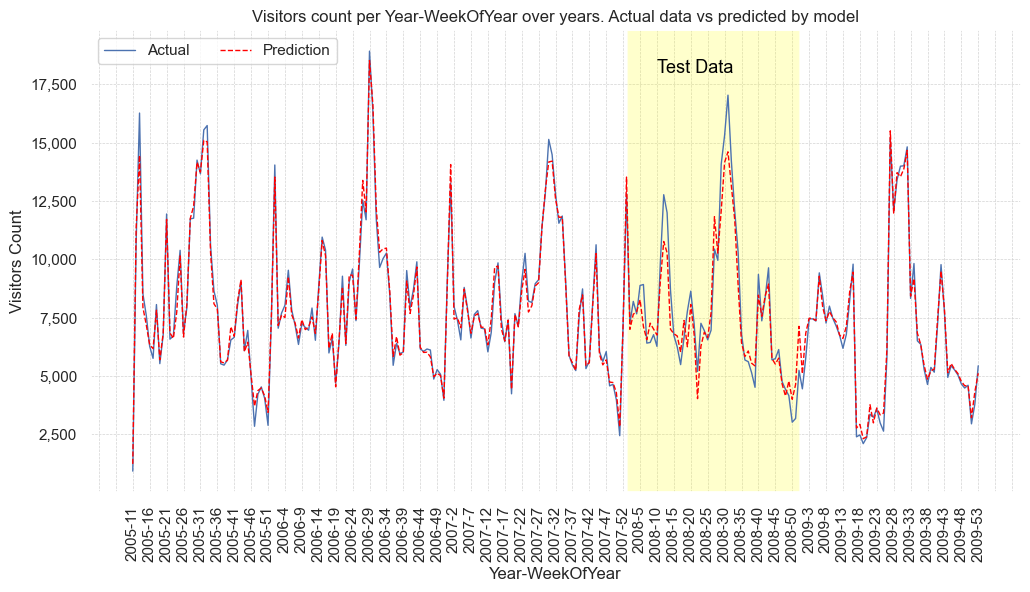

In [75]:
eval_on_features(X_train, y_train, X_test, y_test,rfr)
#eval_on_features(X,y,rfr)

In [76]:
def plot_feature_importances(regressor, X):
    """
    function to plot(bar) feature_importances for regressor
    """
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': regressor.feature_importances_
    }).sort_values('importance', ascending=False)

    #plt.gca().set_facecolor("white")
    plt.figure(figsize=(10,6))
    plt.title('Feature Importance')
    sns.barplot(data=feature_importances, x='importance', y='feature')

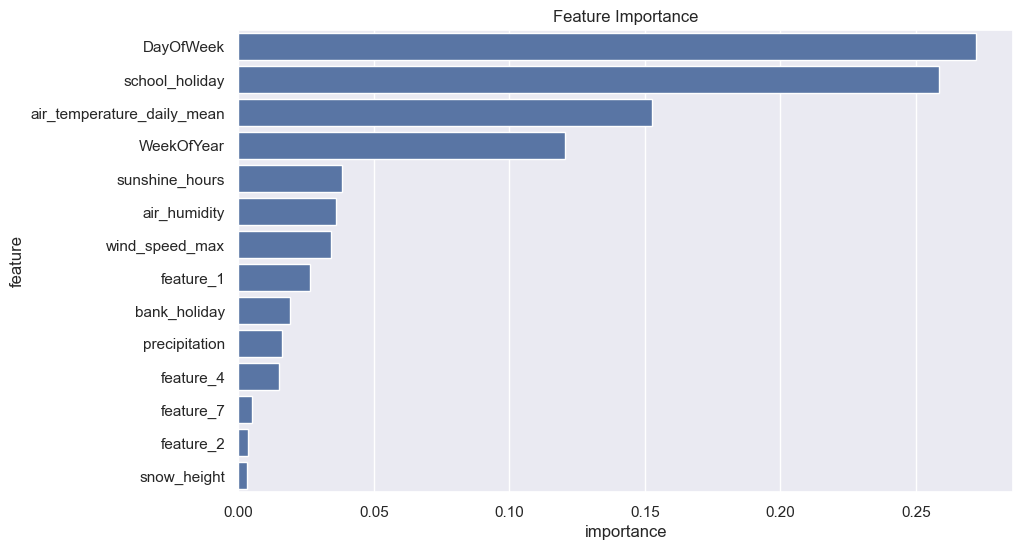

In [77]:
plot_feature_importances(rfr,X_train)

##  <span style='color:#4682B4'> 4.2 Hyperparameter Tuning </span>

In [78]:
model = RandomForestRegressor(random_state=42)
X_train, y_train=data_training_model[features_list], data_training_model['label']
X_test, y_test=data_test_model[features_list], data_test_model['label']   

In [79]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10]
}

In [80]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [81]:
best_model = grid_search.best_estimator_


In [82]:
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores)

array([357.71274444, 324.22934853, 259.55515522, 322.42519591,
       383.05368495])

In [83]:
print(grid_search.best_params_)

print(np.sqrt(-grid_search.best_score_))

{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
332.00605087837505


Train-set RMSE: 131.29
Test-set RMSE: 266.79


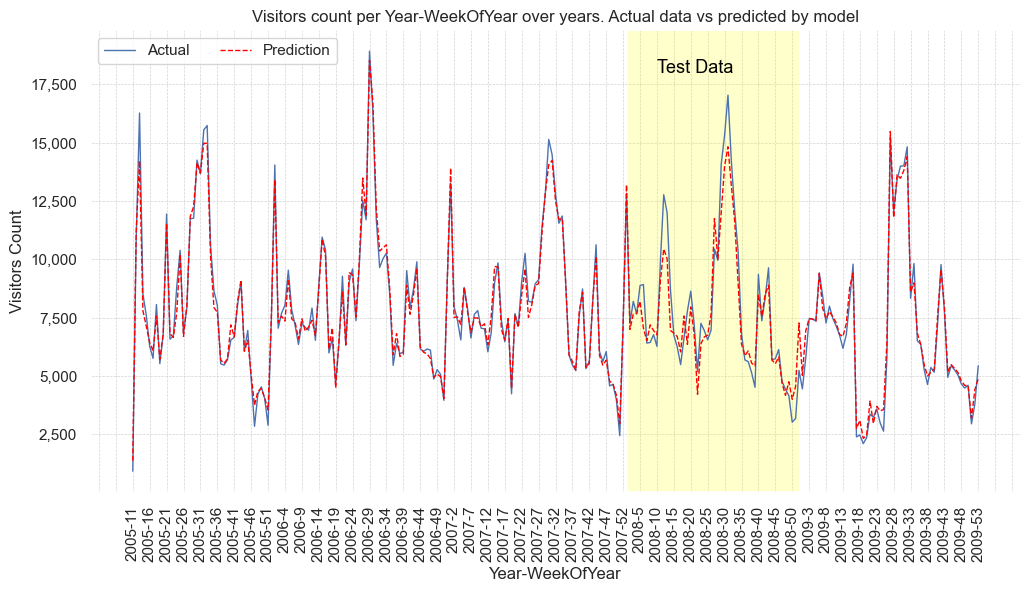

In [84]:
eval_on_features(X_train, y_train, X_test, y_test,best_model)

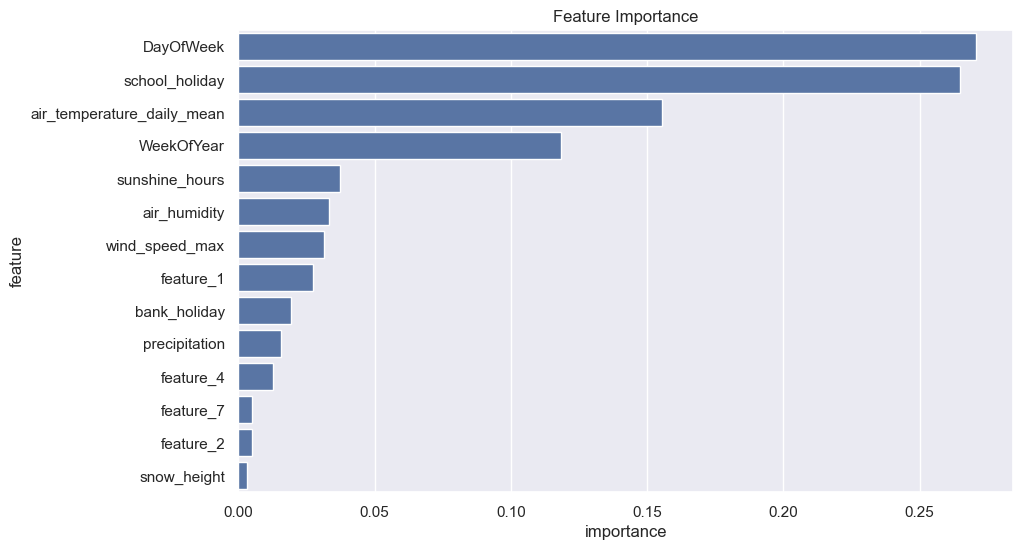

In [85]:
plot_feature_importances(best_model,X_train)


##  <span style='color:#4682B4'> 4.3 Saving Trained Model </span>

In [86]:

# Save to file in the current working directory
joblib_file = "joblib_model.pkl"  
joblib.dump(best_model, joblib_file)


['joblib_model.pkl']

# <span style='color:#4682B4'> 5. Data Predictions and Submission </span>

##  <span style='color:#4682B4'> 5.1 Predict and save results in CSV </span>

In [87]:
data_predict.head()

,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
0,2010-01-01,3,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN
1,2010-01-02,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN
2,2010-01-03,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN
3,2010-01-04,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN
4,2010-01-05,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,NaN


In [88]:
# join with weather data
data_predict_merged=data_predict.merge(weather_final, how='inner', left_on='date', right_on='date')
print(data_predict_merged.shape[0])
data_predict_merged.head()

363


,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_10,label,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,2010-01-01,3,0,0,0,4.6,7.6,2.6,4.6,0,...,0,NaN,91.0,-1.5,-2.1,-3.3,0.2,10.0,0.0,7.4
1,2010-01-02,0,0,0,0,4.6,7.6,2.6,4.6,0,...,0,NaN,89.0,-2.0,-3.7,-5.3,7.5,9.0,0.0,5.9
2,2010-01-03,0,0,0,0,4.6,7.6,2.6,4.6,0,...,0,NaN,91.0,-3.5,-4.6,-5.6,0.2,17.0,0.3,6.5
3,2010-01-04,0,0,0,0,4.6,7.6,2.6,4.6,0,...,0,NaN,89.0,-3.3,-4.9,-7.4,0.3,16.0,1.0,9.1
4,2010-01-05,0,0,0,0,4.6,7.6,2.6,4.6,0,...,0,NaN,90.0,-0.7,-1.9,-3.3,1.1,15.0,0.0,8.2


In [89]:
data_predict_merged.isnull().sum()

date                            0
bank_holiday                    0
feature_0                       0
feature_1                       0
feature_2                       0
feature_3                       0
feature_4                       0
feature_5                       0
feature_6                       0
feature_7                       0
school_holiday                  0
feature_8                       0
feature_9                       0
feature_10                      0
label                         363
air_humidity                    0
air_temperature_daily_max       0
air_temperature_daily_mean      0
air_temperature_daily_min       0
precipitation                   0
snow_height                     0
sunshine_hours                  0
wind_speed_max                  0
dtype: int64

In [90]:
# extract date info
extract_date_info(data_predict_merged)

In [91]:
#load model
joblib_model = joblib.load(joblib_file)

In [92]:
prediction = np.round(joblib_model.predict(data_predict_merged[features_list])).tolist()

In [93]:
final_prediction=data_predict[['date','label']].copy()
final_prediction['label']=prediction

# check number of rows and dateformat
print(final_prediction.shape[0])
final_prediction.head()

363


,date,label
0,2010-01-01,634.0
1,2010-01-02,671.0
2,2010-01-03,644.0
3,2010-01-04,1279.0
4,2010-01-05,1410.0


In [94]:
# save to csv
final_prediction.to_csv("final_prediction.csv", index=None)

##  <span style='color:#4682B4'> 5.2 Compare 2010 prediction per Month with 2005-2009 data  </span>

In [95]:
data_compare=pd.concat([data[['date','label']],final_prediction])
extract_date_info(data_compare)
data_compare_grouped_by_month=data_compare.groupby(['Year','Month'])['label'].sum().reset_index()
data_compare_grouped_by_month.sort_index(inplace=True)
data_compare_grouped_by_month.tail()

,Year,Month,label
65,2010,8,43944.0
66,2010,9,23723.0
67,2010,10,32284.0
68,2010,11,20781.0
69,2010,12,23927.0


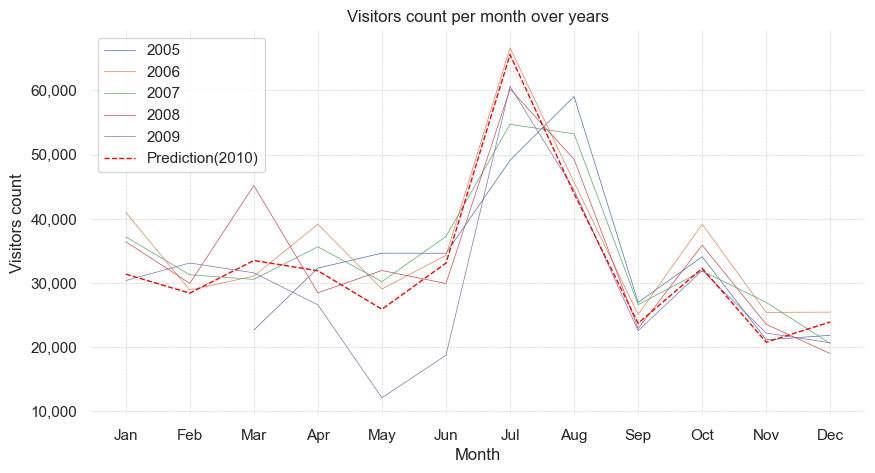

In [96]:
plt.figure(figsize=(10, 5))
years=list(data_compare_grouped_by_month['Year'].unique())
years.remove(2010)

for i in years:
    plt.plot(data_compare_grouped_by_month['Month'][data_compare_grouped_by_month['Year']==i], 
         data_compare_grouped_by_month['label'][data_compare_grouped_by_month['Year']==i], label=i, linewidth=0.5)
    
plt.plot(data_compare_grouped_by_month['Month'][data_compare_grouped_by_month['Year']==2010], 
         data_compare_grouped_by_month['label'][data_compare_grouped_by_month['Year']==2010],'--',
         label='Prediction(2010)', linewidth=1, color='red')
        

fmt = '{x:,.0f}'
ytick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(ytick)
plt.xticks(range(1,13,1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(ncol=1, loc='upper left',facecolor='white')
plt.gca().set_facecolor("white")
plt.title("Visitors count per month over years")
plt.xlabel("Month")
plt.ylabel("Visitors count")

plt.grid(axis = 'x',color='lightgrey', linestyle='--', linewidth=0.5)
plt.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)